In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/limedatasetnew/LimeDataSet - Copy.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

In [3]:
datas = pd.read_csv('../input/limedatasetnew/LimeDataSet - Copy.csv')
datas

,Organic.Content,Sand,Silt,Clay,Clay2,Gravel,Lime,UCS_std_Soaked_7Days,UCS_std_Soaked_28Days
0,1.33,2,29,69,98,0,0,0.000,0.000
1,1.33,2,29,69,98,0,2,25.300,28.270
2,1.33,2,29,69,98,0,4,107.160,123.530
3,1.33,2,29,69,98,0,8,169.670,303.627
4,1.33,2,29,69,98,0,12,174.139,320.000
...,...,...,...,...,...,...,...,...,...
173,0.20,16,14,71,84,0,6,83.030,66.310
174,0.20,16,14,71,84,0,8,133.010,199.910
175,0.20,16,14,71,84,0,10,160.680,216.430
176,0.20,16,14,71,84,0,12,178.600,245.500


In [4]:
datas.shape

(178, 9)

In [5]:
datas.size

1602

In [6]:
datas.head()

,Organic.Content,Sand,Silt,Clay,Clay2,Gravel,Lime,UCS_std_Soaked_7Days,UCS_std_Soaked_28Days
0,1.33,2,29,69,98,0,0,0.000,0.000
1,1.33,2,29,69,98,0,2,25.300,28.270
2,1.33,2,29,69,98,0,4,107.160,123.530
3,1.33,2,29,69,98,0,8,169.670,303.627
4,1.33,2,29,69,98,0,12,174.139,320.000


In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Organic.Content        178 non-null    float64
 1   Sand                   178 non-null    int64  
 2   Silt                   178 non-null    int64  
 3   Clay                   178 non-null    int64  
 4   Clay2                  178 non-null    int64  
 5   Gravel                 178 non-null    int64  
 6   Lime                   178 non-null    int64  
 7   UCS_std_Soaked_7Days   178 non-null    float64
 8   UCS_std_Soaked_28Days  178 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 12.6 KB


In [8]:
datas.describe()

,Organic.Content,Sand,Silt,Clay,Clay2,Gravel,Lime,UCS_std_Soaked_7Days,UCS_std_Soaked_28Days
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.993202,16.410112,41.022472,37.646067,78.550562,5.078652,5.977528,104.787079,175.057533
std,1.467133,15.940756,19.340527,17.304959,23.388640,13.483805,4.108631,80.344470,148.652253
min,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,30.000000,29.000000,63.000000,0.000000,2.000000,34.550000,44.445000
50%,0.170000,12.000000,37.000000,39.000000,84.000000,0.000000,6.000000,106.775000,154.960000
75%,1.600000,29.750000,57.000000,46.000000,98.000000,2.000000,10.000000,158.900000,267.737500
max,4.770000,65.000000,81.000000,75.000000,100.000000,70.000000,14.000000,338.460000,611.470000


In [9]:
datas.nunique()

Organic.Content           21
Sand                      24
Silt                      27
Clay                      26
Clay2                     24
Gravel                    12
Lime                       9
UCS_std_Soaked_7Days     154
UCS_std_Soaked_28Days    155
dtype: int64

In [10]:

datas.isnull().sum()


Organic.Content          0
Sand                     0
Silt                     0
Clay                     0
Clay2                    0
Gravel                   0
Lime                     0
UCS_std_Soaked_7Days     0
UCS_std_Soaked_28Days    0
dtype: int64

<AxesSubplot:>

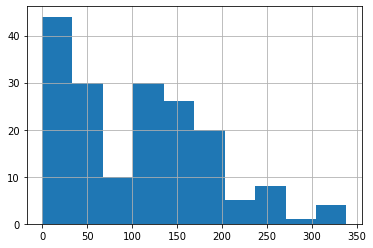

In [11]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
datas['UCS_std_Soaked_7Days'].hist()

<AxesSubplot:>

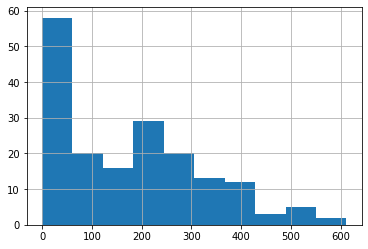

In [12]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
datas['UCS_std_Soaked_28Days'].hist()

array([[<AxesSubplot:title={'center':'Organic.Content'}>,
        <AxesSubplot:title={'center':'Sand'}>,
        <AxesSubplot:title={'center':'Silt'}>],
       [<AxesSubplot:title={'center':'Clay'}>,
        <AxesSubplot:title={'center':'Clay2'}>,
        <AxesSubplot:title={'center':'Gravel'}>],
       [<AxesSubplot:title={'center':'Lime'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

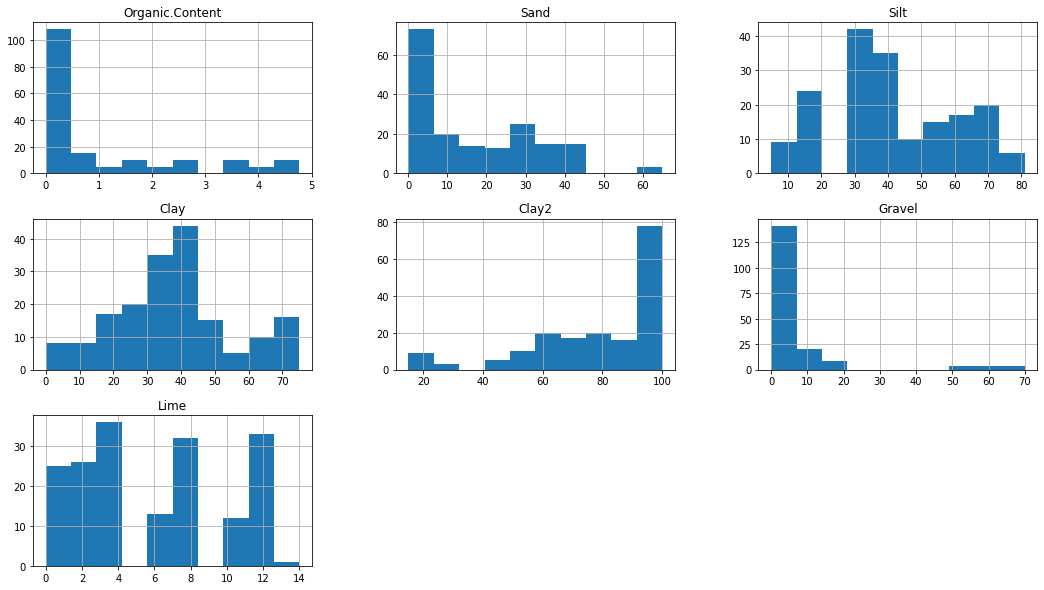

In [13]:
# Plotting histograms of multiple columns together
datas.hist(['Organic.Content', 'Sand', 'Silt',
                'Clay', 'Clay2','Gravel', 
                           'Lime'], figsize=(18,10))

<AxesSubplot:>

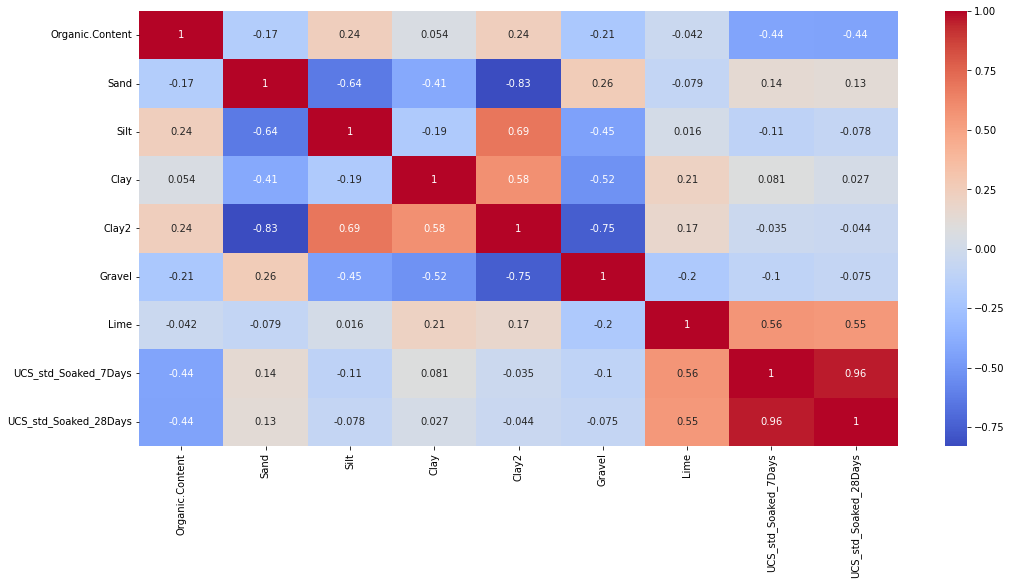

In [14]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(datas.corr(),annot=True, cmap='coolwarm')

In [15]:
# Calculating correlation matrix
ContinuousCols=['Organic.Content', 'Sand', 'Silt','Clay', 'Clay2','Gravel','Lime','UCS_std_Soaked_7Days','UCS_std_Soaked_28Days']

# Creating the correlation matrix
CorrelationData=datas[ContinuousCols].corr()
CorrelationData

,Organic.Content,Sand,Silt,Clay,Clay2,Gravel,Lime,UCS_std_Soaked_7Days,UCS_std_Soaked_28Days
Organic.Content,1.000000,-0.170252,0.242342,0.053576,0.239668,-0.210453,-0.041509,-0.435799,-0.437296
Sand,-0.170252,1.000000,-0.635659,-0.407203,-0.828763,0.257414,-0.079392,0.136830,0.127356
Silt,0.242342,-0.635659,1.000000,-0.188566,0.689743,-0.445729,0.015719,-0.113021,-0.078312
Clay,0.053576,-0.407203,-0.188566,1.000000,0.580742,-0.523892,0.210303,0.080630,0.027320
Clay2,0.239668,-0.828763,0.689743,0.580742,1.000000,-0.753845,0.167513,-0.034908,-0.044257
Gravel,-0.210453,0.257414,-0.445729,-0.523892,-0.753845,1.000000,-0.198116,-0.103507,-0.075252
Lime,-0.041509,-0.079392,0.015719,0.210303,0.167513,-0.198116,1.000000,0.557516,0.546258
UCS_std_Soaked_7Days,-0.435799,0.136830,-0.113021,0.080630,-0.034908,-0.103507,0.557516,1.000000,0.960958
UCS_std_Soaked_28Days,-0.437296,0.127356,-0.078312,0.027320,-0.044257,-0.075252,0.546258,0.960958,1.000000


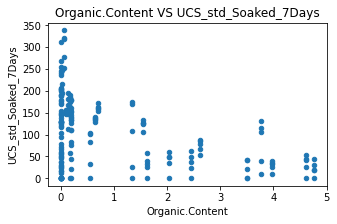

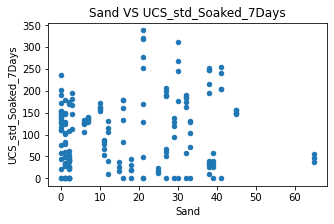

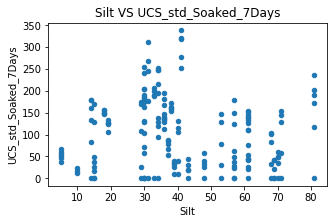

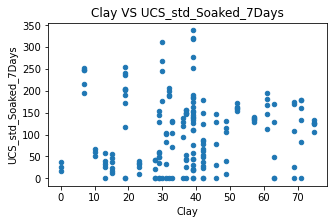

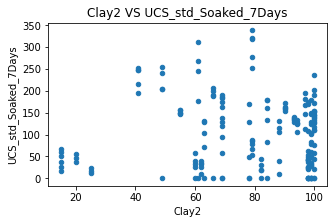

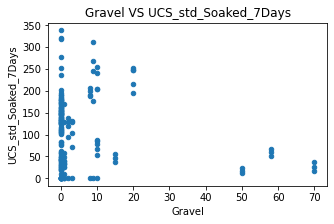

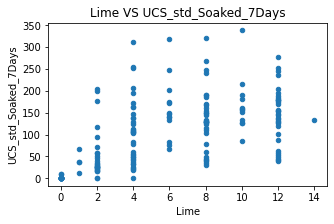

In [16]:
ContinuousCols=['Organic.Content','Sand','Silt','Clay','Clay2','Gravel','Lime']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    datas.plot.scatter(x=predictor, y='UCS_std_Soaked_7Days', figsize=(5,3), title=predictor+" VS "+ 'UCS_std_Soaked_7Days')
    

In [ ]:
ContinuousCols=['Organic.Content','Sand','Silt','Clay','Clay2','Gravel','Lime']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    datas.plot.scatter(x=predictor, y='UCS_std_Soaked_28Days', figsize=(5,3), title=predictor+" VS "+ 'UCS_std_Soaked_28Days')

In [ ]:



    datas.plot.scatter(x='UCS_std_Soaked_7Days', y='UCS_std_Soaked_28Days', figsize=(5,3), title='UCS_std_Soaked_7Days'+" VS "+ 'UCS_std_Soaked_28Days')

In [ ]:
SelectedColumns=['Organic.Content','Sand','Silt','Clay','Clay2','Gravel','Lime']

# Selecting final columns
DataForML=datas[SelectedColumns]
DataForML

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['UCS_std_Soaked_7Days']=datas['UCS_std_Soaked_7Days']
# Adding Target Variable to the data
DataForML_Numeric['UCS_std_Soaked_28Days']=datas['UCS_std_Soaked_28Days']

# Printing sample rows
DataForML_Numeric.head()

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='UCS_std_Soaked_7Days'
Predictors=['Organic.Content','Sand','Silt','Clay','Clay2','Gravel','Lime']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
# Split dataset into training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

In [ ]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

In [ ]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

print("Model R^2 (Before Optimization): {:.5f}".format(best_model.score(X_test, y_test)))

In [ ]:
params = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5]
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)

clf.best_params_

In [ ]:
print("Model R^2 (After Optimization): {:.5f}".format(clf.score(X_test, y_test)))

In [ ]:
x_predict = list(best_model.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(53)

In [ ]:

#new_input = [[1,1,30,69,99,0,10]]
#new_output = model.predict(new_input)
#print(new_input, new_output)

In [ ]:
#Cont=['original_values']

# Plotting scatter chart for each predictor vs the target variable
#for predictor in Cont:
 #   datas.plot.scatter(x=predictor, y='predicted_values', figsize=(5,3), title=predictor+" VS "+ 'UCS_std_Soaked_7Days')

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='UCS_std_Soaked_28Days'
Predictors=['Organic.Content','Sand','Silt','Clay','Clay2','Gravel','Lime']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              AdaBoost": AdaBoostRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

In [ ]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

In [ ]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)

print("Model R^2 (Before Optimization): {:.5f}".format(best_model.score(X_test, y_test)))

In [ ]:
params = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5]
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)

clf.best_params_

In [ ]:
print("Model R^2 (After Optimization): {:.5f}".format(clf.score(X_test, y_test)))

In [ ]:
best_model.get_params()

In [ ]:
x_predict = list(best_model.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(53)

In [ ]:
new_input = [[1,1,30,69,99,0,4]]
new_output = model.predict(new_input)
print(new_input, new_output)